In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def LinReg(X,Y, erroriY, errormode=False):
    
    #funziona con arrays e metodo PseudoInversa, devo aggiungere a dati X una colonna di uno
    #restituisce array (q, m) o
    inversa = np.linalg.inv(X.T.dot(X))
    c_errori = inversa.dot(X.T)
    w = c_errori.dot(Y)
    
    #calcolo errori sui coefficienti con propag.errore (hp: variabili scorrelate -> ordini delle rivolte scorrelati)
    if errormode == True:
        err_q = sqrt(absolute(c_errori[0,:].dot(erroriY)))
        err_m = sqrt(absolute(c_errori[1,:].dot(erroriY)))
        return array([err_q, err_m]).reshape(1,2)
    else:
        return w.reshape(1,2)

In [3]:
def chiquadronorm(oss, fit, dstdoss, ddof, aiuto=False, norm=True):
    #prende liste monodimensionali come argomenti
    scarti = []
    scartierrore = []
    scartierrorequadri = []
    for i in range(len(oss)):
        scarti.append(oss[i]-fit[i])
        scartierrore.append(scarti[i] / dstdoss[i])
        scartierrorequadri.append(scartierrore[i] * scartierrore[i])
        if (aiuto==True):
            print('scarti= ', scarti[i])
            print('scartierrore= ', scartierrore[i])
            print('scartierrorequadri= ', scartierrorequadri[i])
            
    chiquadro=sum(scartierrorequadri)
    chiquadroreg=chiquadro/ddof
    
    if(norm==True):
        return (chiquadroreg)
    else:
        return (chiquadro)

Procedo con presa dati ulteriore per verificare indipendenza degli eventi: aumento il campione di esperimenti a 20 data l'alta varianza sulle variabili

### Presa Dati

In [4]:
medie_attesa = [49.65, 49.2, 54.3, 41.3, 45.8]
Medie_attesa = array(medie_attesa).reshape(-1,1)
dstd_attesa = [32.7916468824479, 31.0391942380496, 33.6203259322314, 19.3855616374662, 28.1847289745426]
Dstd_attesa = array(dstd_attesa)

medie_partecipanti = [613.7, 671.1, 794.55, 749.55, 604.6]
Medie_partecipanti = array(medie_partecipanti).reshape(-1,1)
dstd_partecipanti = [322.282991043259, 363.353083319648, 383.816770292668, 370.42599587644, 329.595669363476]
Dstd_partecipanti = array(dstd_partecipanti)

medie_durata = [2.35, 2.65, 2.775, 2.475, 2.25]
Medie_durata = array(medie_durata).reshape(-1,1)
dstd_durata = [0.966545666958261, 1.19097483291276, 1.22581873821025, 1.1742858972248, 1.1180339887499]
Dstd_durata = array(dstd_durata)

ordine = [1, 2, 3, 4, 5]
Ordine = array(ordine).reshape(-1, 1)

In [5]:
#modifico dati X per poter usare metodo con pseudoinversa (LinReg())
OrdineLinR = insert(Ordine, 0, ones(len(Ordine)), axis=1)
OrdineLinR.shape

(5, 2)

### Tempi attesa
Regressione lineare

In [6]:
q_attesa = LinReg(OrdineLinR, Medie_attesa, Dstd_attesa)[0,0]
m_attesa = LinReg(OrdineLinR, Medie_attesa, Dstd_attesa)[0,1]
print('m= ', m_attesa,'  q= ', q_attesa)

errq_attesa = LinReg(OrdineLinR, Medie_attesa, Dstd_attesa, errormode=True)[0,0]
errm_attesa = LinReg(OrdineLinR, Medie_attesa, Dstd_attesa, errormode=True)[0,1]
print('errore m= ', errm_attesa, '  errore q= ', errq_attesa)

m=  -1.5599999999999987   q=  52.730000000000054
errore m=  1.4445576629679409   errore q=  5.93839473745774


Plot

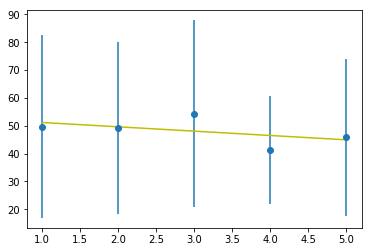

In [7]:
fit_attesa = q_attesa + m_attesa*Ordine

errorbar(Ordine, medie_attesa, dstd_attesa, fmt='o')
plot(ordine, fit_attesa, 'y-')

Chi quadro - bontà del Fit

In [9]:
chiquadronorm_attesa = chiquadronorm(medie_attesa, fit_attesa, dstd_attesa, 3, norm=True)
chiquadronorm_attesa

0.036503739963622064

### Partecipanti

Regressione Lineare

In [10]:
q_partecipanti = LinReg(OrdineLinR, Medie_partecipanti, Dstd_partecipanti)[0,0]
m_partecipanti = LinReg(OrdineLinR, Medie_partecipanti, Dstd_partecipanti)[0,1]
print('m= ', m_partecipanti,'  q= ', q_partecipanti)

errq_partecipanti = LinReg(OrdineLinR, Medie_partecipanti, Dstd_partecipanti, errormode=True)[0,0]
errm_partecipanti = LinReg(OrdineLinR, Medie_partecipanti, Dstd_partecipanti, errormode=True)[0,1]
print('errore m= ', errm_partecipanti, '  errore q= ', errq_partecipanti)

m=  6.02500000000002   q=  668.6250000000009
errore m=  1.4730332378200466   errore q=  18.6382783866947


Plot

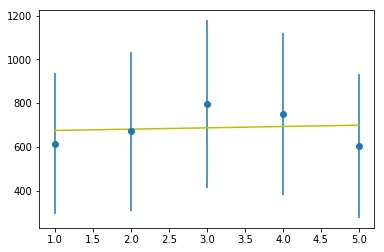

In [11]:
fit_partecipanti = q_partecipanti + m_partecipanti*Ordine

errorbar(Ordine, medie_partecipanti, dstd_partecipanti, fmt='o')
plot(ordine, fit_partecipanti, 'y-')

Chi quadro - bontà del Fit

In [12]:
chiquadronorm_partecipanti = chiquadronorm(medie_partecipanti, fit_partecipanti, dstd_partecipanti, 3, norm=True)
chiquadronorm_partecipanti

0.07351616803594704

### Durata

Regressione Lineare

In [14]:
q_durata = LinReg(OrdineLinR, Medie_durata, Dstd_durata)[0,0]
m_durata = LinReg(OrdineLinR, Medie_durata, Dstd_durata)[0,1]
print('m= ', m_durata,'  q= ', q_durata)

errq_durata = LinReg(OrdineLinR, Medie_durata, Dstd_durata, errormode=True)[0,0]
errm_durata = LinReg(OrdineLinR, Medie_durata, Dstd_durata, errormode=True)[0,1]
print('errore m= ', errm_durata, '  errore q= ', errq_durata)

m=  -0.037499999999999895   q=  2.6125000000000034
errore m=  0.16920038649344704   errore q=  1.0243268582062077


Plot

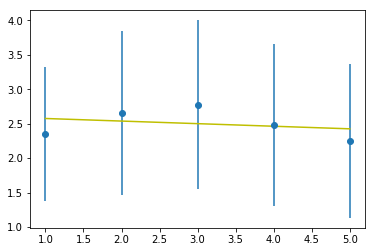

In [15]:
fit_durata = q_durata + m_durata*Ordine

errorbar(Ordine, medie_durata, dstd_durata, fmt='o')
plot(ordine, fit_durata, 'y-')

Chi quadro - bontà del Fit

In [16]:
chiquadronorm_durata = chiquadronorm(medie_durata, fit_durata, dstd_durata, 3, norm=True)
chiquadronorm_durata

0.04601819894904948

-----------------------